In [1]:
import numpy as np
import pandas as pd

from rdkit import Chem
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_ipab = pd.read_csv("results_ipab/docked.csv")
df_fda = pd.read_csv("results_fda/docked.csv")

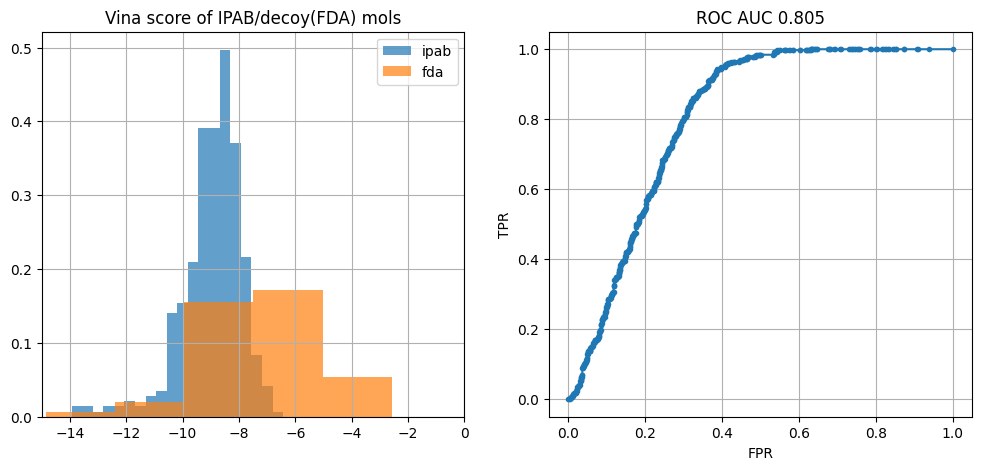

In [4]:
df_ipab["label"] = 1
df_fda["label"] = 0
df_merged = pd.concat([df_ipab, df_fda], axis=0)
true_label = df_merged.label.values == 1
pred = df_merged.score.values

plt.figure(figsize=(12, 5))
markersize: float = 3.0

plt.subplot(1, 2, 1)
plt.hist(df_ipab.score.values, bins=20, label='ipab', density=True, alpha=0.7)
plt.hist(df_fda.query("score < 0").query("score > -15").score.values, bins=5, label='fda', density=True, alpha=0.7)
plt.xlim(-15, 0)
plt.grid()
plt.legend()
plt.title("Vina score of IPAB/decoy(FDA) mols")

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(true_label, -pred)
roc_auc = roc_auc_score(true_label, -pred)
plt.plot(fpr, tpr, marker='o', markersize=markersize)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f"ROC AUC {roc_auc:.3f}")
plt.grid()

plt.savefig("vina-02.png")
plt.show()